In [244]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Several helpful packages to load**

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [246]:
#read csv file
df=pd.read_csv('/content/drive/MyDrive/Projects/house_price/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [247]:
df['date'] = pd.to_datetime(df['date'])
df.drop(columns='id',inplace=True)
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [248]:
list(df.columns)

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [249]:
data=df[[ 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']]

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

# **Data Exploration and Visualization**

In [251]:
 # Find NAN
missing= df.isnull().sum().sort_values(ascending= False)
print(missing)

date             0
price            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
sqft_lot15       0
dtype: int64


In [252]:
data[data.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352


In [253]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [254]:
data['bedrooms'].value_counts()  # 13 bedrooms=0 !


3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [255]:
data['bathrooms'].value_counts() # 10  bathrooms=0 !

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [256]:
#print(data['sqft_lot'].min())   #520
#print(data['sqft_living'].min())   #290
data[['sqft_living', 'sqft_lot']][data['bedrooms']==0]   #compare with area

,sqft_living,sqft_lot
875,3064,4764
3119,1470,979
3467,1430,1650
4868,390,5900
6994,4810,28008
8477,2290,8319
8484,1810,5669
9773,2460,8049
9854,1470,4800
12653,1490,7111


Text(0, 0.5, 'number of bedrooms')

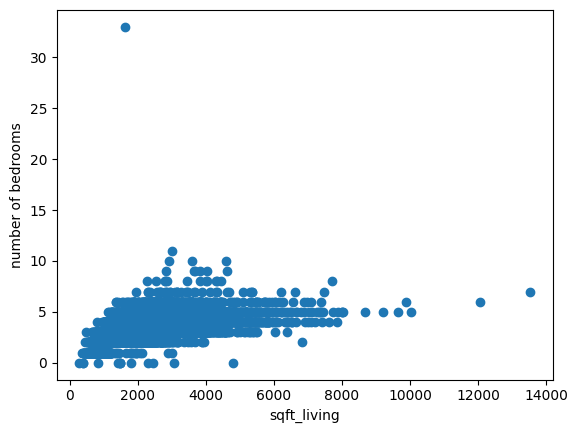

In [257]:
plt.scatter(data['sqft_living'],data['bedrooms'])
plt.xlabel('sqft_living')
plt.ylabel('number of bedrooms')
# maybe the number of bedrooms doesnt depends on area

In [258]:
data[['sqft_living','bedrooms']].corr()

,sqft_living,bedrooms
sqft_living,1.000000,0.576671
bedrooms,0.576671,1.000000


Text(0, 0.5, 'number of bathrooms')

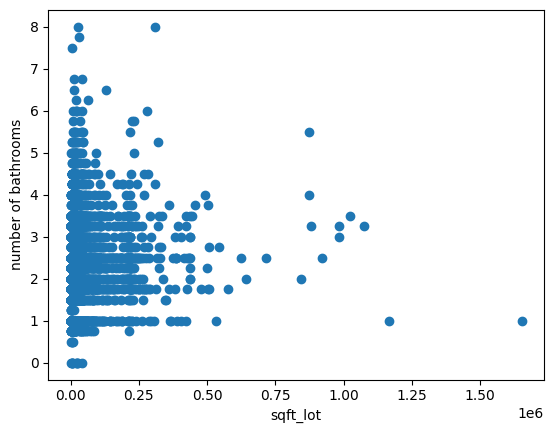

In [259]:
plt.scatter(data['sqft_lot'],data['bathrooms'])
plt.xlabel('sqft_lot')
plt.ylabel('number of bathrooms')

Text(0, 0.5, 'number of bathrooms')

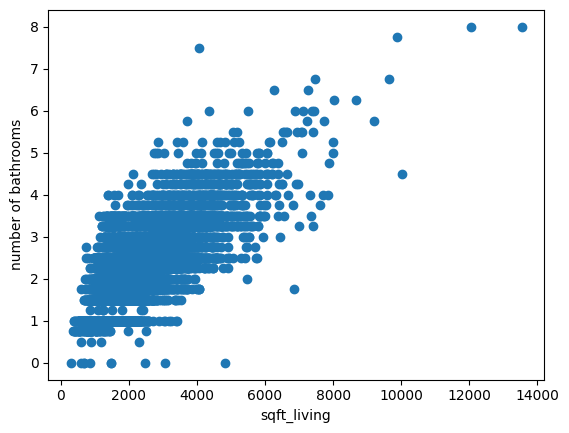

In [260]:
plt.scatter(data['sqft_living'],data['bathrooms'])
plt.xlabel('sqft_living')
plt.ylabel('number of bathrooms')

In [261]:
data[['sqft_living','bathrooms']].corr()
# strong relation

,sqft_living,bathrooms
sqft_living,1.000000,0.754665
bathrooms,0.754665,1.000000


In [262]:
compar_with_area=data[['sqft_living', 'sqft_lot']][data['bathrooms']==0]
compar_with_area

,sqft_living,sqft_lot
875,3064,4764
1149,670,43377
3119,1470,979
5832,600,24501
6994,4810,28008
9773,2460,8049
9854,1470,4800
10481,690,23244
14423,844,4269
19452,290,20875


<Axes: ylabel='Frequency'>

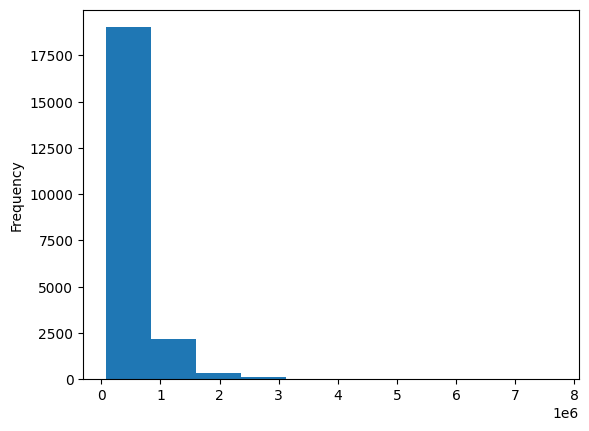

In [263]:
#plt.hist(df['price'], bins=50);
#data['price'].plot(kind='kde')
data['price'].plot(kind='hist')

<Axes: xlabel='bedrooms'>

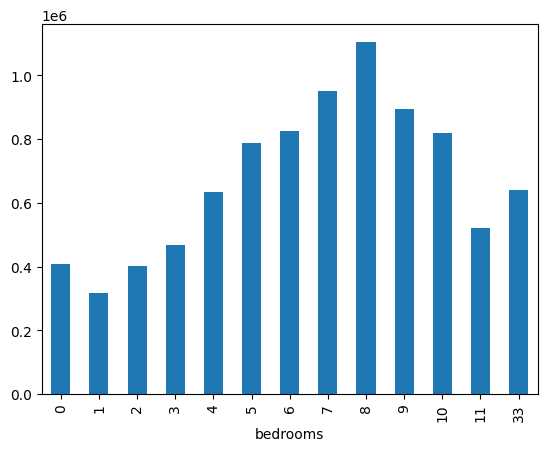

In [264]:
data.groupby(['bedrooms'])['price'].mean().plot(kind='bar')

<Axes: xlabel='floors'>

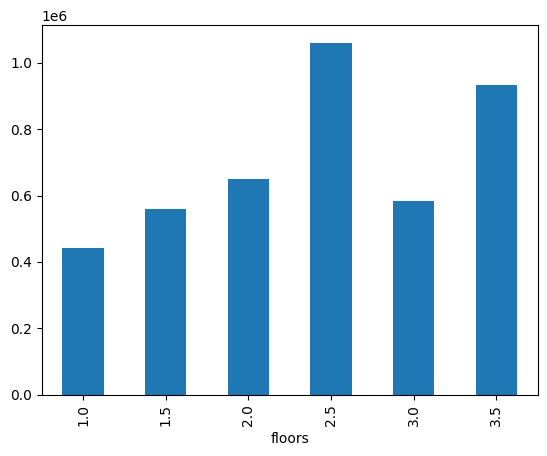

In [265]:
data.groupby(['floors'])['price'].mean().plot(kind='bar')

<Axes: xlabel='sqft_living'>

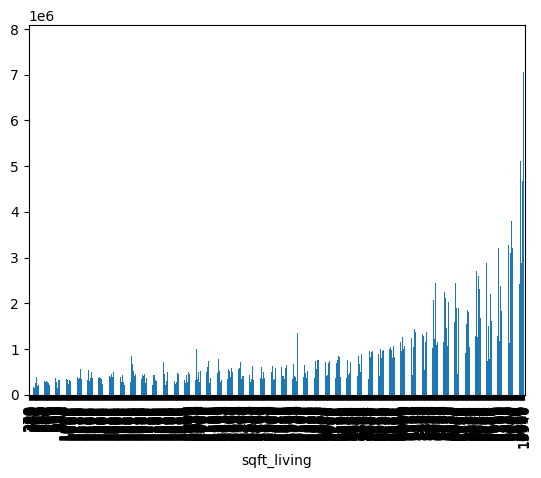

In [266]:
data.groupby(['sqft_living'])['price'].mean().plot(kind='bar')

<Axes: xlabel='grade'>

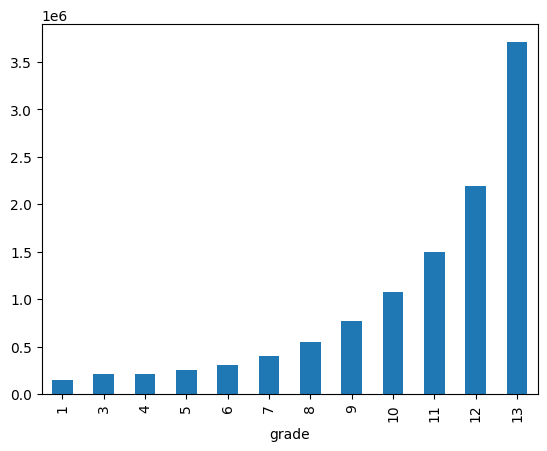

In [267]:
data.groupby(['grade'])['price'].mean().plot(kind='bar')

<Axes: xlabel='sqft_above'>

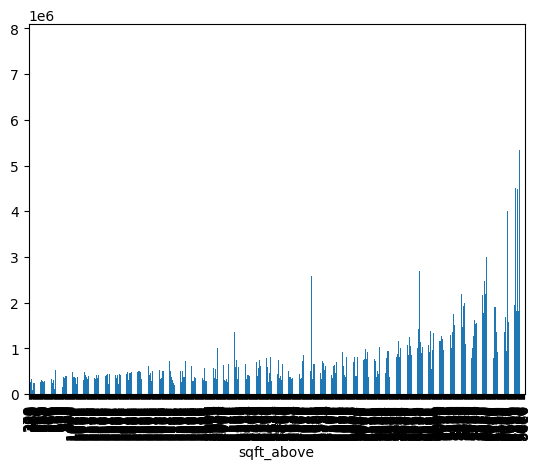

In [268]:
data.groupby(['sqft_above'])['price'].mean().plot(kind='bar')

<Axes: xlabel='sqft_living15'>

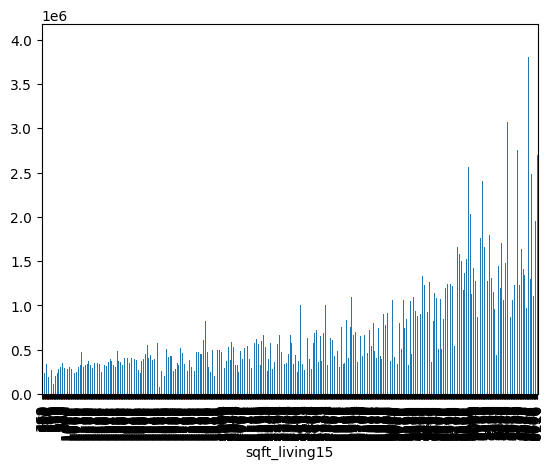

In [269]:
data.groupby(['sqft_living15'])['price'].mean().plot(kind='bar')

<Axes: xlabel='bathrooms'>

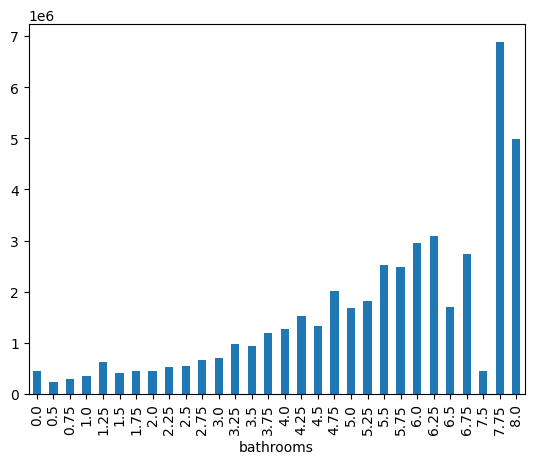

In [270]:
data.groupby(['bathrooms'])['price'].mean().plot(kind='bar')

In [271]:
data.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# **Data cleaning**

In [272]:
data[data['price']==0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [273]:
data=data.drop_duplicates()

In [274]:
data[data.duplicated()]
data.shape

(21608, 19)

In [275]:
data[['bathrooms']][(data['sqft_living']> 290)& (data['sqft_living']< 3064)].mean()  #2


bathrooms    1.964744
dtype: float64

In [276]:
data['bathrooms'] = data['bathrooms'].replace(0, 2)

**Outliers**

**bedrooms**

<Axes: >

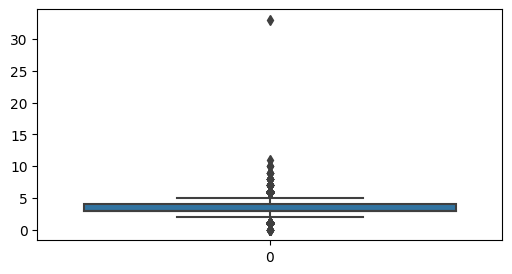

In [277]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(data['bedrooms'])



3.0 4.0 1.0


<Axes: >

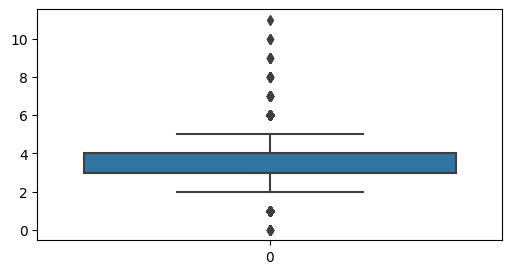

In [278]:
percentile25 = data['bedrooms'].quantile(0.25)
percentile75 = data['bedrooms'].quantile(0.75)
iqr = percentile75 -percentile25
print(percentile25,percentile75,iqr)
upper_limit = percentile75 + 8* iqr
lower_limit = percentile25 - 4 * iqr
new_df1 = data[data['bedrooms'] < upper_limit]
#new_df1 = new_df1[new_df1['bedrooms'] > lower_limit]

plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df1['bedrooms'])

In [279]:
print(data.shape)
print(new_df1.shape)

(21608, 19)
(21607, 19)


**bathrooms**

<Axes: >

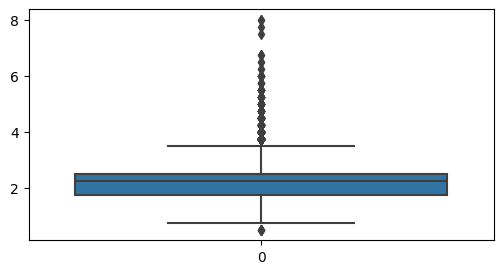

In [280]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df1['bathrooms'])

**sqft_living**

<Axes: >

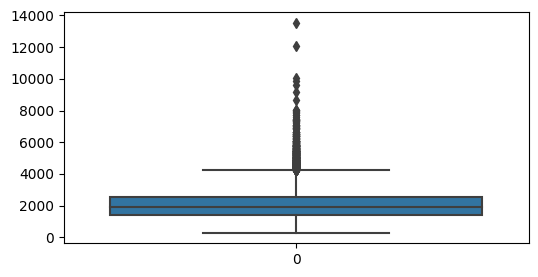

In [281]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df1['sqft_living'])

1428.5 2550.0 1121.5


<Axes: >

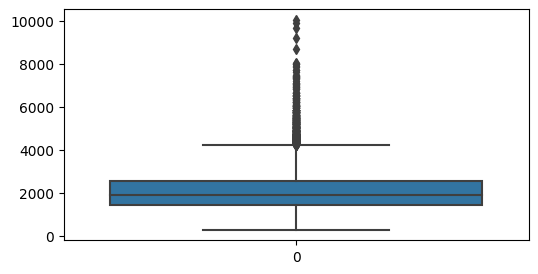

In [282]:
percentile25 = new_df1['sqft_living'].quantile(0.25)
percentile75 = new_df1['sqft_living'].quantile(0.75)
iqr = percentile75 -percentile25
print(percentile25,percentile75,iqr)
upper_limit = percentile75 + 7* iqr
#lower_limit = percentile25 - 1.5 * iqr
new_df2 = new_df1[new_df1['sqft_living'] < upper_limit]
#new_df2 = new_df2[new_df2['sqft_living'] < upper_limit]

plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df2['sqft_living'])

In [283]:
print(new_df1.shape)
print(new_df2.shape)

(21607, 19)
(21605, 19)


**Floors**

<Axes: >

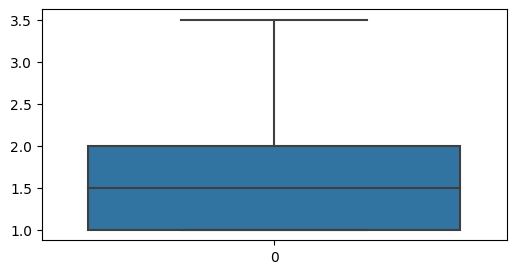

In [284]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df2['floors'])

**grade**

<Axes: >

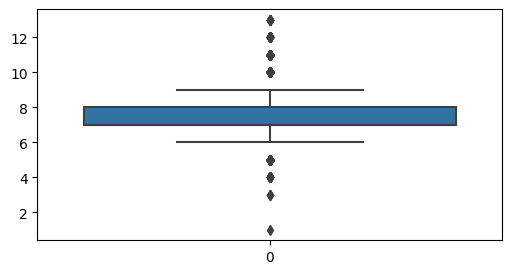

In [285]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df2['grade'])

7.0 8.0 1.0


<Axes: >

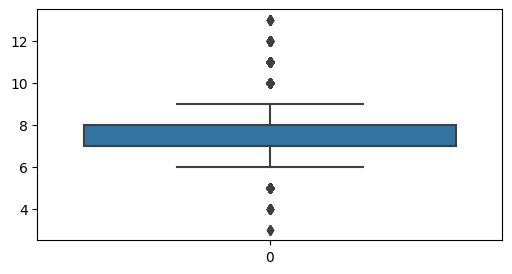

In [286]:
percentile25 = new_df2['grade'].quantile(0.25)
percentile75 = new_df2['grade'].quantile(0.75)
iqr = percentile75 -percentile25
print(percentile25,percentile75,iqr)

#upper_limit = percentile75 + 1.5* iqr
lower_limit = percentile25 - 5 * iqr

#new_df3 = new_df2[new_df2['grade'] < upper_limit]
new_df3 = new_df2[new_df2['grade'] > lower_limit]
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df3['grade'])

In [287]:
print(new_df2.shape)
print(new_df3.shape)

(21605, 19)
(21604, 19)


**sqft_above**

<Axes: >

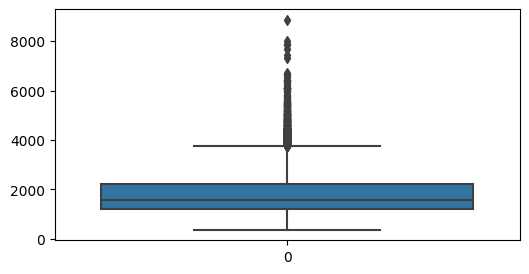

In [288]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df3['sqft_above'])

1190.0 2210.0 1020.0


<Axes: >

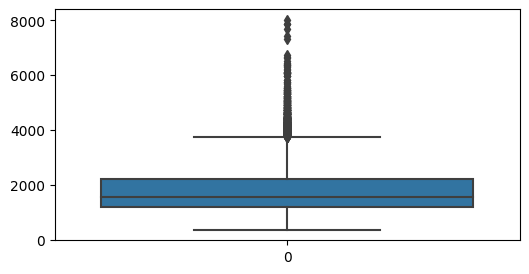

In [289]:
percentile25 = new_df3['sqft_above'].quantile(0.25)
percentile75 = new_df3['sqft_above'].quantile(0.75)
iqr = percentile75 -percentile25
print(percentile25,percentile75,iqr)

upper_limit = percentile75 + 6 * iqr
#lower_limit = percentile25 - 1.5 * iqr


new_df4 = new_df3[new_df3['sqft_above'] < upper_limit]
#new_df4 = new_df4[new_df4['sqft_above'] < upper_limit]


plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df4['sqft_above'])

In [290]:
print(new_df3.shape)
print(new_df4.shape)

(21604, 19)
(21603, 19)


**sqft_basement**

<Axes: >

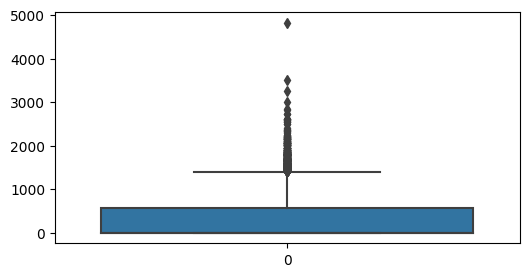

In [291]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df4['sqft_basement'])

0.0 560.0 560.0


<Axes: >

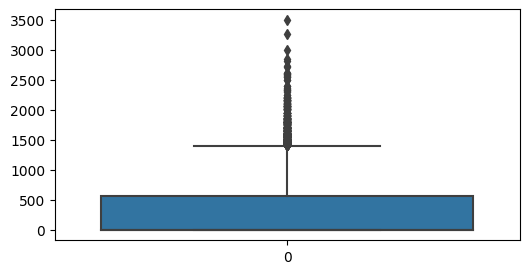

In [292]:
percentile25 = new_df4['sqft_basement'].quantile(0.25)
percentile75 = new_df4['sqft_basement'].quantile(0.75)
iqr = percentile75 -percentile25
print(percentile25,percentile75,iqr)
upper_limit = percentile75 + 5.3 * iqr

new_df5 = new_df4[new_df4['sqft_basement'] < upper_limit]

plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df5['sqft_basement'])

In [293]:
print(new_df4.shape)
print(new_df5.shape)

(21603, 19)
(21602, 19)


**lat**

<Axes: >

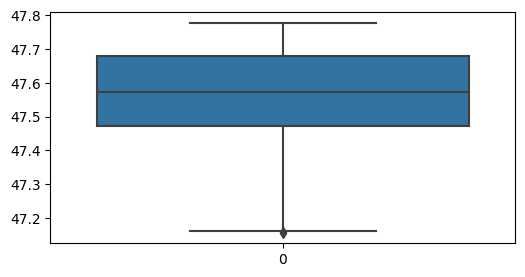

In [294]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df5['lat'])

47.4708 47.678 0.20720000000000027


<Axes: >

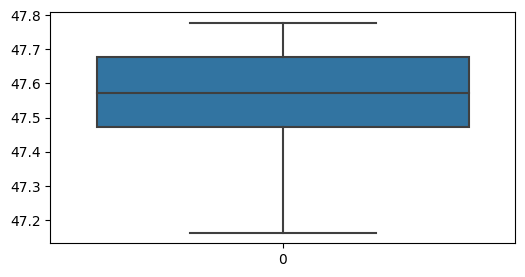

In [295]:
percentile25 = new_df5['lat'].quantile(0.25)
percentile75 = new_df5['lat'].quantile(0.75)
iqr = percentile75 -percentile25
print(percentile25,percentile75,iqr)
lower_limit = percentile25 - 1.5 * iqr

new_df6 = new_df5[new_df5['lat'] > lower_limit]

plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df6['lat'])

In [296]:
print(new_df5.shape)
print(new_df6.shape)

(21602, 19)
(21600, 19)


**sqft_living15**

<Axes: >

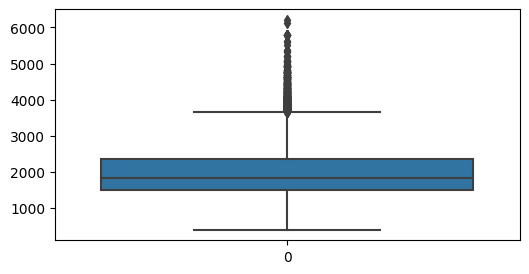

In [297]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df6['sqft_living15'])

**price**

<Axes: >

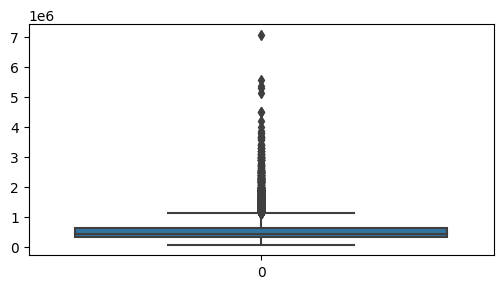

In [298]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df6['price'])

321500.0 645000.0 323500.0


<Axes: >

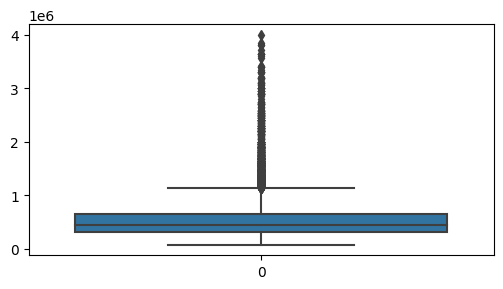

In [299]:
#new_df6 = new_df5[(new_df5['price']>new_df5['price'].quantile(0.025))&(new_df5['price']<new_df5['price'].quantile(0.975))]
percentile25 = new_df6['price'].quantile(0.25)
percentile75 = new_df6['price'].quantile(0.75)
iqr = percentile75 -percentile25
print(percentile25,percentile75,iqr)
upper_limit = percentile75 + 11* iqr

new_df7 = new_df6[new_df6['price'] < upper_limit]

plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.boxplot(new_df7['price'])

In [300]:
print(new_df6.shape)
print(new_df7.shape)

(21600, 19)
(21592, 19)


In [301]:
data=new_df7

# **correlation**

<Axes: >

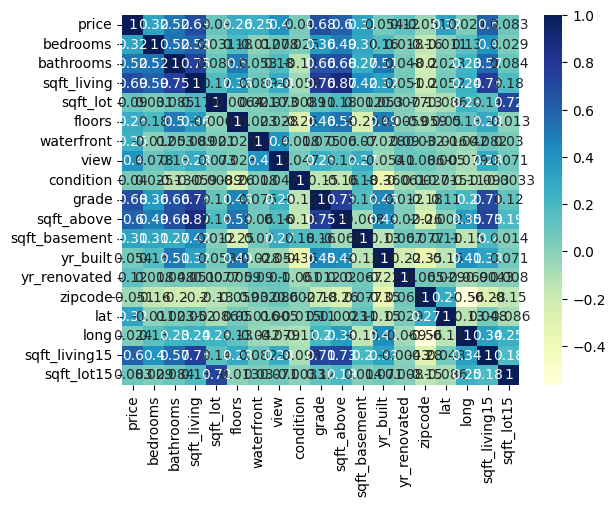

In [302]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [303]:
data.corr()['price'].sort_values()
#data.corr().head(1)


zipcode         -0.051301
long             0.023724
condition        0.040412
yr_built         0.054388
sqft_lot15       0.082661
sqft_lot         0.090278
yr_renovated     0.123323
waterfront       0.248459
floors           0.263545
sqft_basement    0.311612
bedrooms         0.316711
lat              0.319975
view             0.395887
bathrooms        0.520478
sqft_living15    0.596767
sqft_above       0.598723
grade            0.677487
sqft_living      0.694883
price            1.000000
Name: price, dtype: float64

In [304]:
#strong features
data=df[[ 'price',
 'yr_renovated',
 'floors',
 'waterfront',
 'lat',
 'bedrooms',
 'sqft_basement',
 'view',
 'bathrooms',
 'sqft_living15',
 'sqft_above',
 'grade',
 'sqft_living' ]]


# **Splitting**

In [305]:
x=data.iloc[:,1:13]
y=data['price']

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state= 44, shuffle= True)
print('X_train is ',X_train.shape)
print('X_test is ',X_test.shape)
print('y_train is ',y_train.shape)
print('y_test is ',y_test.shape)

X_train is  (17290, 12)
X_test is  (4323, 12)
y_train is  (17290,)
y_test is  (4323,)


# **preprocessing**

In [307]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Modeling**

In [308]:
#!pip3 install catboost

In [309]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [310]:
from sklearn.model_selection import GridSearchCV

lr = LinearRegression()
ada = AdaBoostRegressor( n_estimators=100, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=20, n_estimators=300, learning_rate =.01)
#########################################################
knn = KNeighborsRegressor()
parameters = {
    'n_neighbors': list(range(3, 15))
   }
clf_knn = GridSearchCV(knn, parameters)
#########################################################
dt = DecisionTreeRegressor()
parameters = {
    'max_depth': list(range(3, 15))
   }
clf_dt = GridSearchCV(dt, parameters)

############################################################
rf = RandomForestRegressor(random_state=42)
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,350,400,500],
    'max_depth': [7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}
clf_rf = GridSearchCV(rf, parameters)
###############################################################
xgb = XGBRegressor()
parameters = {
    'max_depth': list(range(9, 11)),
    'n_estimators': list(range(100, 550,50)),
    'learning_rate': [ 0.05, 0.1]
}
clf_xgb = GridSearchCV(xgb, parameters)
########################################################################
cb = CatBoostRegressor(verbose = 0)
parameters = {
    'max_depth': list(range(9, 11)),
    'learning_rate': [ 0.05, 0.1]
}
clf_cb = GridSearchCV(cb, parameters)
####################################################################

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', clf_knn),
               ('Decision Tree', clf_dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Gradient Boosting Regressor', gbr), ('XGBoost', clf_xgb), ('catboost', clf_cb)]



# **Predecting**

Linear Regression : 66 %
Linear Regression : 215560 
K Nearest Neighbours : 75 %
K Nearest Neighbours : 187139 
Decision Tree : 75 %
Decision Tree : 185632 
Random Forest : 83 %
Random Forest : 155283 
AdaBoost : 63 %
AdaBoost : 226914 
Gradient Boosting Regressor : 71 %
Gradient Boosting Regressor : 200190 
XGBoost : 83 %
XGBoost : 151904 
catboost : 85 %
catboost : 145992 


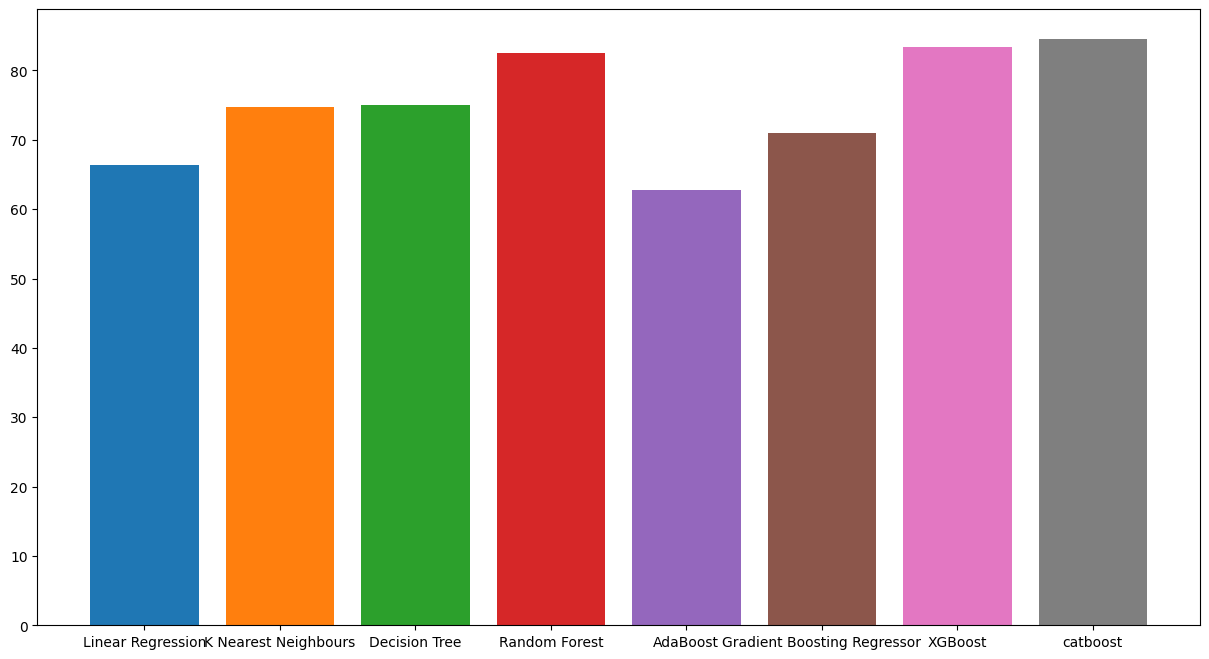

In [311]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

for regressor_name, regressor in regressors:

    # Fit regressor to the training set
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    score = (r2_score(y_test,y_pred))*100
    RMSE  =  np.sqrt(mean_squared_error(y_test, y_pred))


    # Evaluate  score on the test set
    print('{:s} : {:.0f} %'.format(regressor_name, score))
    print('{:s} : {:.0f} '.format(regressor_name, RMSE))
    plt.rcParams["figure.figsize"] = (15,8)
    plt.bar(regressor_name,score)